In [48]:
# bibliotecas e formatos
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots
import nbformat

#estilo plt
plt.style.use("ggplot")

#formato numerico pandas
pd.options.display.float_format = '{:.2f}'.format

#### Dicionarios de dados
Store	

Date	

Weekly_Sales	

Holiday_Flag	

Temperature	

Fuel_Price	

CPI	

Unemployment




### ETL

In [49]:
df = pd.read_csv('Base_Dados - Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


In [50]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [51]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [52]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [53]:
df.Date = pd.to_datetime(df.Date,dayfirst=True)
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2,2010


In [54]:
anl_macro = df.groupby(by=['year','month']).agg(sum_faturamento=('Weekly_Sales','sum')).reset_index()
anl_macro.dtypes

year                 int32
month                int32
sum_faturamento    float64
dtype: object

In [55]:
anl_macro['Data'] = anl_macro.year.astype('str') +'-'+ anl_macro.month.astype('str') + '-1'
anl_macro['Data'] = pd.to_datetime(anl_macro['Data'])
anl_macro

,year,month,sum_faturamento,Data
0,2010,2,190332983.04,2010-02-01
1,2010,3,181919802.50,2010-03-01
2,2010,4,231412368.05,2010-04-01
3,2010,5,186710934.34,2010-05-01
4,2010,6,192246172.36,2010-06-01
5,2010,7,232580125.98,2010-07-01
6,2010,8,187640110.89,2010-08-01
7,2010,9,177267896.37,2010-09-01
8,2010,10,217161824.02,2010-10-01
9,2010,11,202853370.14,2010-11-01


EDA

In [56]:
fig = px.line(anl_macro, x="Data", y="sum_faturamento",  title='Net Sales time series', markers=True)
fig.update_traces(textposition="bottom right")
fig.show('png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
df['Store'] = df['Store'].astype('str')
# Criar lista de LOJAS únicos
lojas = df['Store'].unique()

# Criar a figura com 3 colunas e 5 linhas
fig = subplots.make_subplots(rows=15, cols=3, subplot_titles=lojas)

# Adicionar um gráfico de linha para cada país
for i, loja in enumerate(lojas):
    # Filtrar dados para o país específico
    lojas_data = df[df['Store'] == loja]
    
    # Criar o gráfico de linha
    fig.add_trace(
        px.line(lojas_data, x='Date', y='Weekly_Sales', title=loja).data[0],
        row=(i // 3) + 1, col=(i % 3) + 1
    )

# Atualizar layout da figura
fig.update_layout(height=1200, width=1500, title_text="Séries Temporais por Loja")
fig.show('png')

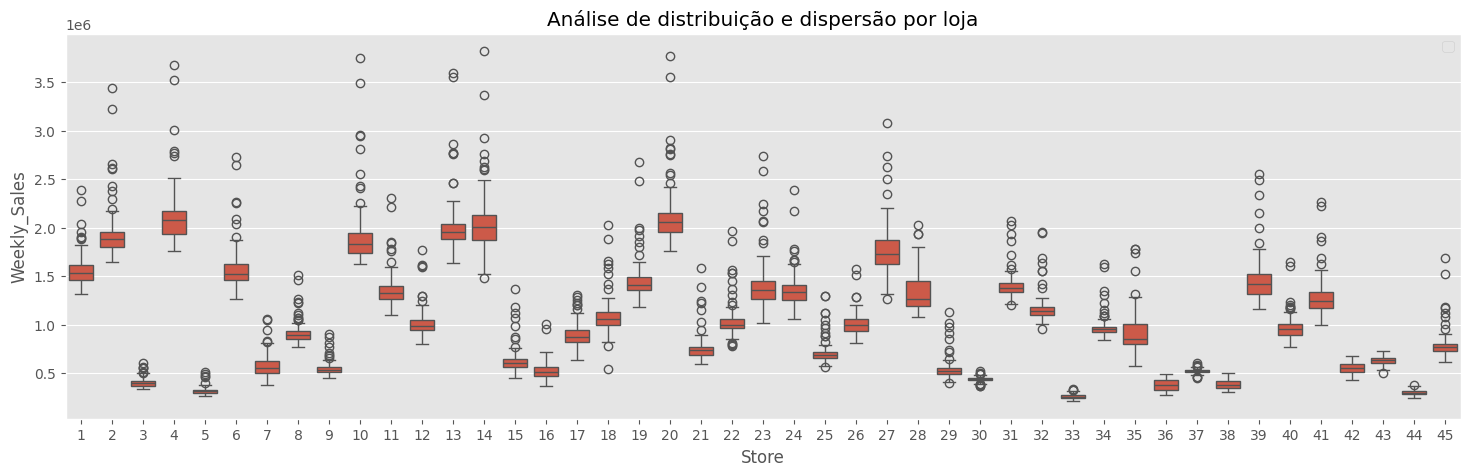

In [ ]:
#plotando series de bloxplots
plt.figure(figsize=[18,5])
plt.title('Análise de distribuição e dispersão por loja')
sns.boxplot(df,x='Store',y='Weekly_Sales' )
plt.legend([])